In [10]:
import pandas as pd
import visualization

pool = {}
scenario_list = ['base','bipolar', 'scattered', 'polycentric']
scenario_list += ['polycentric1','polycentric1a','polycentric1b','polycentric1c']

scenario = scenario_list[0]
df_dict = pd.read_excel('../../model/%s/summaries.xlsx'%scenario, sheet_name=None)

for key in df_dict.keys():
    pool[key] = []
    
for scenario in scenario_list:
    df_dict = pd.read_excel(r'../../model/' + scenario + '/summaries.xlsx', sheet_name=None)
    for key, value in df_dict.items():

        value['scenario'] = scenario
        col = [c for c in value.columns if 'scenario' not in c]
        col.insert(-1, 'scenario')
        value = value[col]
        pool[key].append(value)
        
stacks = {k: pd.concat(v) for k, v in pool.items()}
with pd.ExcelWriter(r'../../outputs/summaries.xlsx') as writer:  # doctest: +SKIP
    for name, stack in stacks.items():
        stack.to_excel(writer, sheet_name=name, index=False)

In [11]:
stacks.keys()

dict_keys(['routes', 'link_max', 'link_sum', 'path_sum', 'shares', 'day', 'path_average', 'modes'])

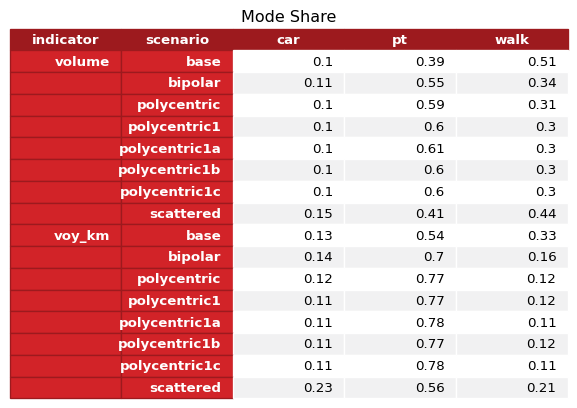

In [12]:
s = stacks['shares']
series = s.set_index(list(s.columns[:-1]))[s.columns[-1]]
data = series.unstack('route_type')

plot = visualization.render_mpl_table(
    data.astype(str),
    header_size=10, font_size=10, 
    row_height=0.3, col_width=1.5, index_width_ratio=1,
)
plot.set_title('Mode Share')
fig = plot.get_figure()
data.to_csv('../../outputs/mode_share_merge_poly.csv', sep=';')
fig.savefig('../../outputs/mode_share_merge_poly.png', bbox_inches='tight')

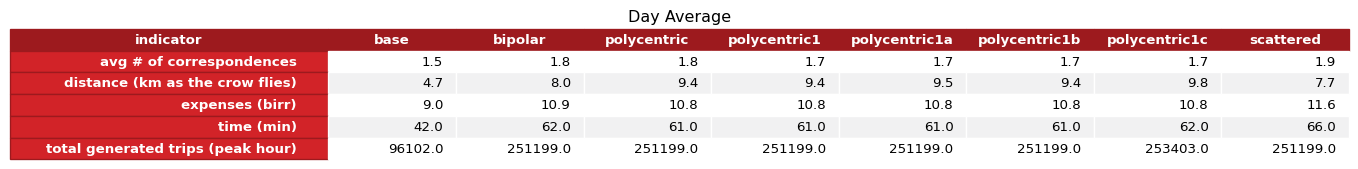

In [13]:
s = stacks['day']
series = s.set_index(list(s.columns[:-1]))[s.columns[-1]]
data = series.unstack('scenario')

plot = visualization.render_mpl_table(
    data.astype(str),
    header_size=10, font_size=10, 
    row_height=0.3, col_width=2, index_width_ratio=2.5,
)
plot.set_title('Day Average')
fig = plot.get_figure()
data.to_csv('../../outputs/day_average_merge_poly.csv', sep=';')
fig.savefig('../../outputs/day_average_merge_poly.png', bbox_inches='tight')

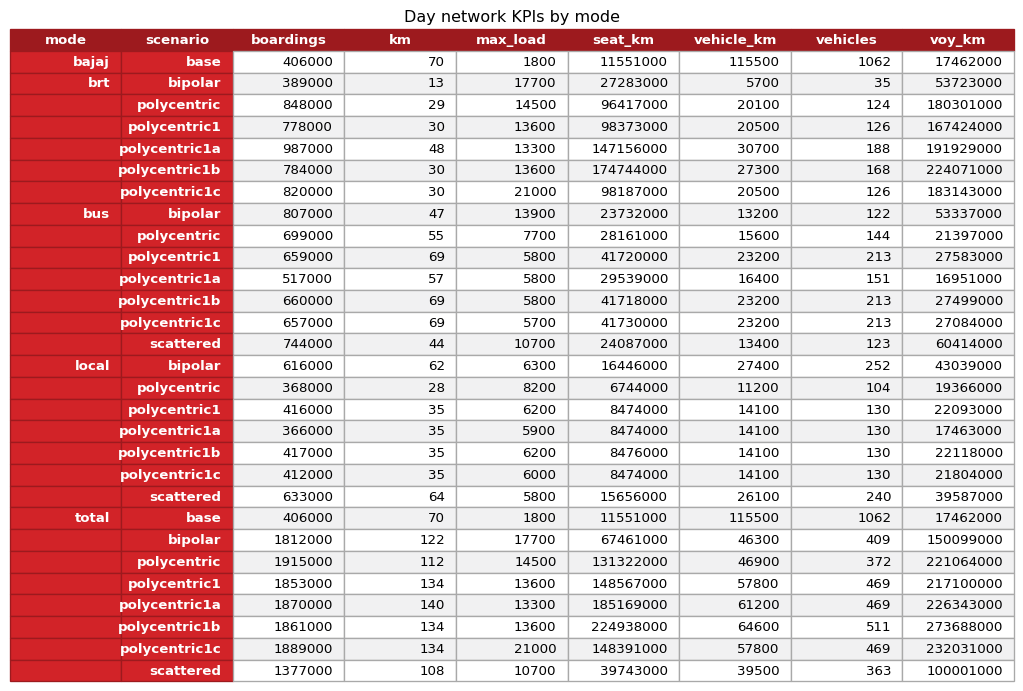

In [14]:
s = stacks['modes']
series = s.set_index(list(s.columns[:-1]))[s.columns[-1]]
data = series.unstack('indicator')
plot = visualization.render_mpl_table(
    data.astype(str),
    header_size=10, font_size=10, 
    row_height=0.3, col_width=1.5, index_width_ratio=1,edge_color='darkgrey'
)
plot.set_title('Day network KPIs by mode')
fig = plot.get_figure()
data.to_csv('../../outputs/modes_merge_poly.csv', sep=';')
fig.savefig('../../outputs/modes_merge_poly.png', bbox_inches='tight')

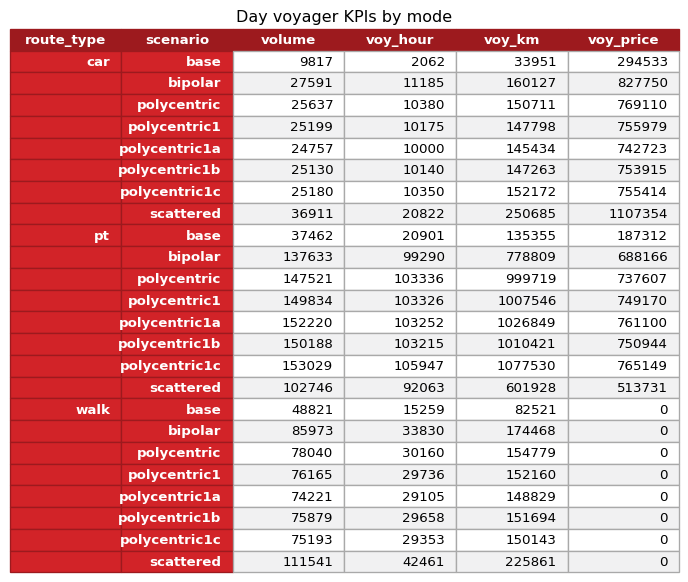

In [15]:
s = stacks['path_sum']
series = s.set_index(list(s.columns[:-1]))[s.columns[-1]]
data = series.unstack('indicator')
data = data.astype(int)
plot = visualization.render_mpl_table(
    data.astype(str),
    header_size=10, font_size=10, 
    row_height=0.3, col_width=1.5, index_width_ratio=1,edge_color='darkgrey'
)
plot.set_title('Day voyager KPIs by mode')
fig = plot.get_figure()
data.to_csv('../../outputs/path_merge_poly.png', sep=';')
fig.savefig('../../outputs/path_merge_poly.png', bbox_inches='tight')